# Download and Load the DataSet

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [70]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [72]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Univariate Analysis

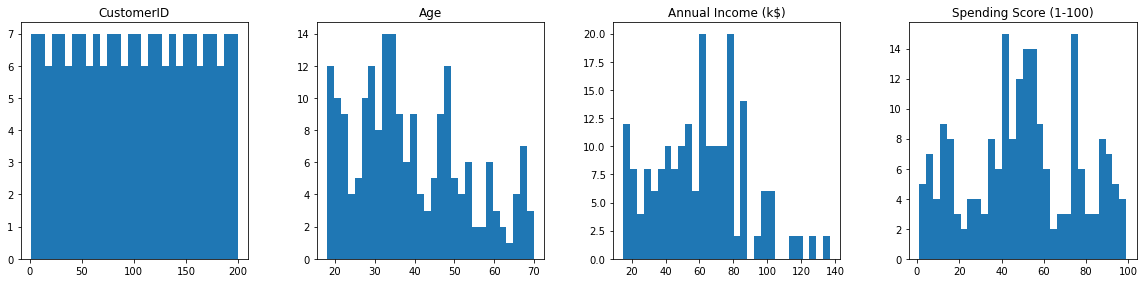

In [73]:
data.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)
plt.show()

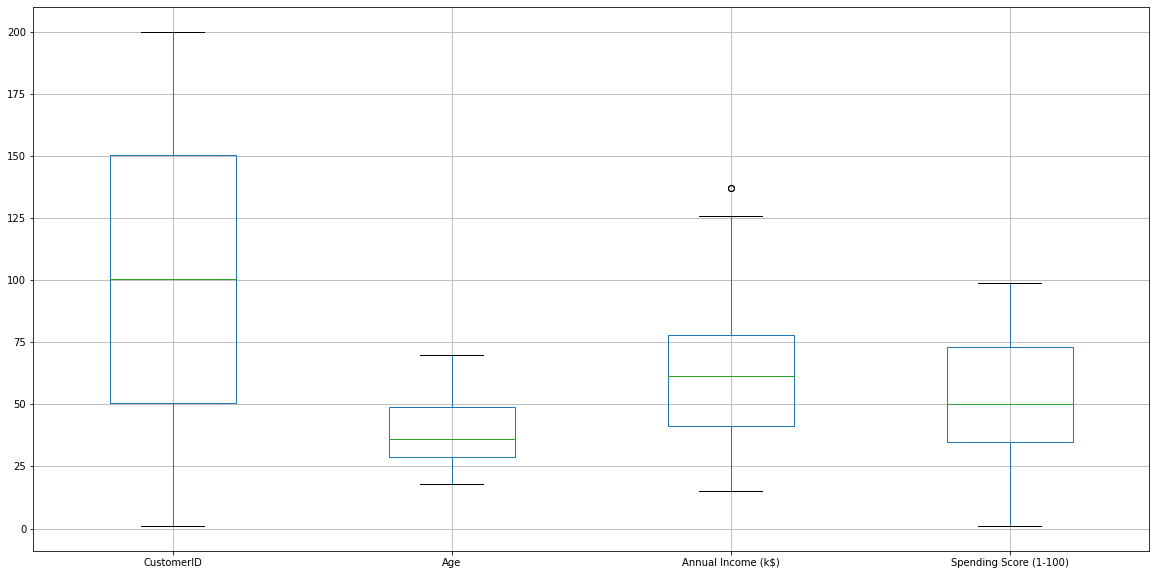

In [74]:
data.boxplot(figsize=(20,10))
plt.show()

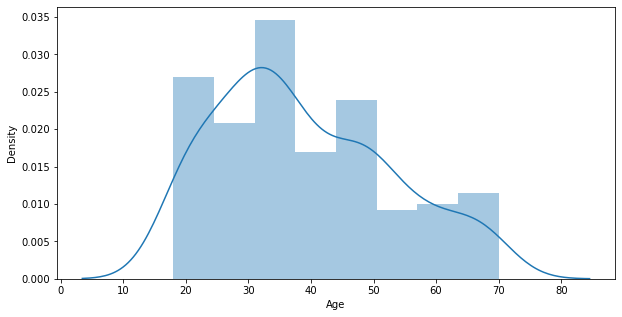

In [75]:
plt.figure(figsize=(10,5))
sns.distplot(data['Age'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

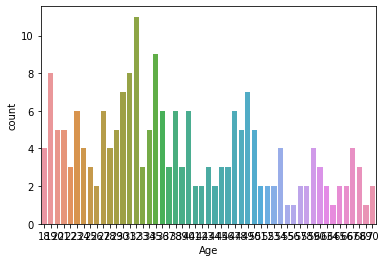

In [76]:
sns.countplot(data['Age'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

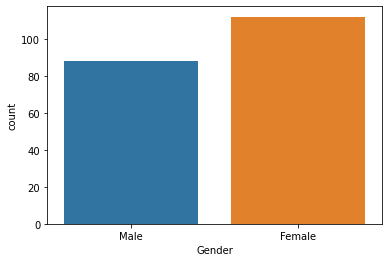

In [77]:
sns.countplot(data['Gender'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

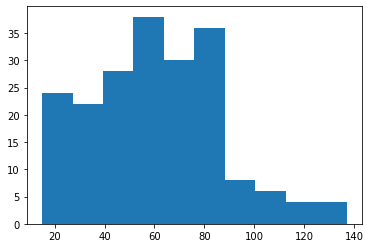

In [78]:
plt.hist(data['Annual Income (k$)'])

# Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

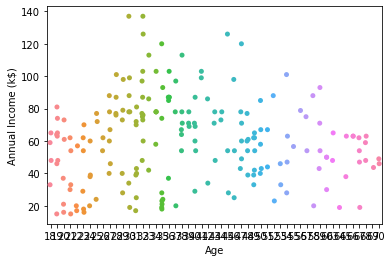

In [79]:
sns.stripplot(x=data['Age'],y=data['Annual Income (k$)'])

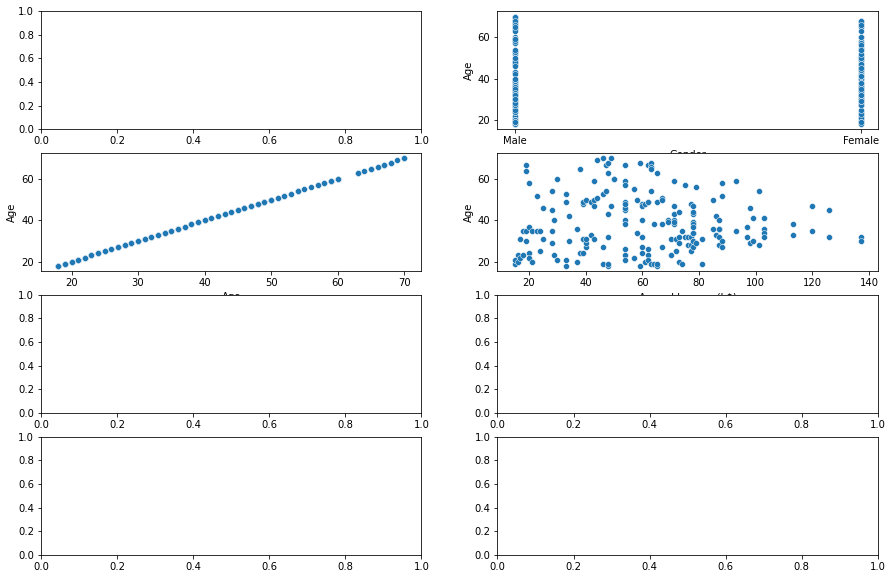

In [80]:
fig, axes = plt.subplots(4,2, figsize=(15,10))
axes = axes.flatten()
for i in range(1,len(data.columns)-1):
    sns.scatterplot(x=data.iloc[:,i], y=data['Age'], ax=axes[i])
plt.show()

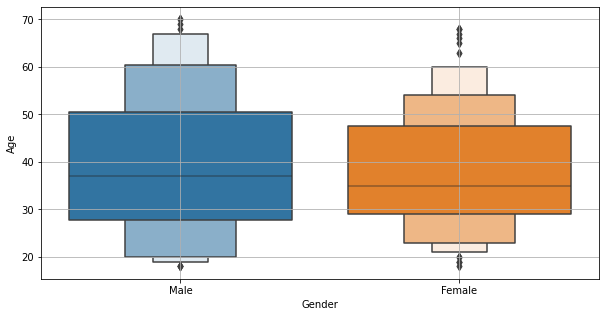

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0


In [81]:
plt.figure(figsize=(10,5))
sns.boxenplot(y=data['Age'], x=data['Gender'])
plt.grid()
plt.show()
data.groupby('Gender')['Age'].describe()

Text(0, 0.5, 'Annual Income (k$)')

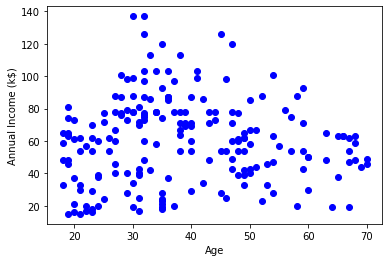

In [82]:
plt.scatter(data['Age'],data['Annual Income (k$)'],color='blue')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

# Multivariate Analysis

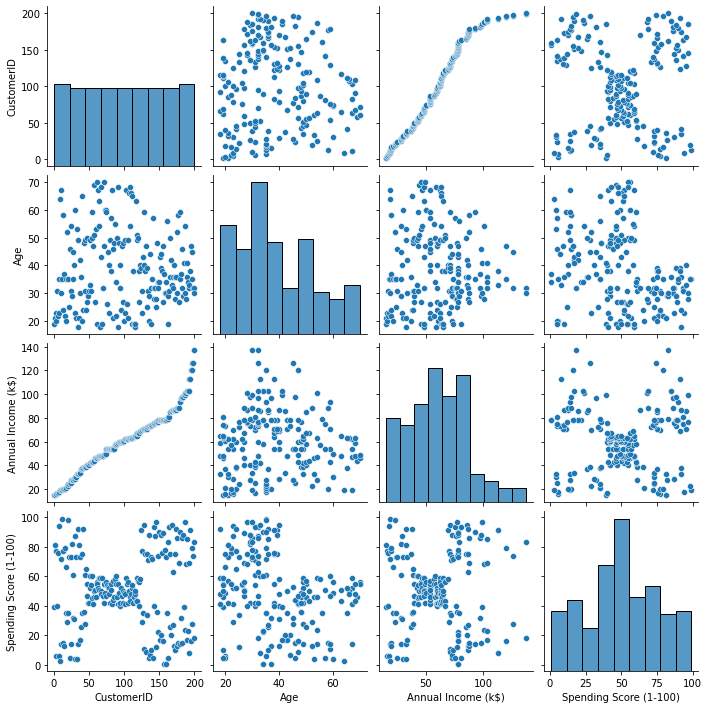

In [83]:
sns.pairplot(data)
plt.show()

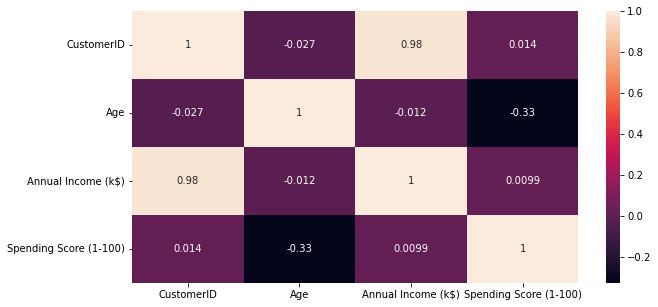

In [84]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Descriptive Statistics

In [85]:
#mean

data.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [86]:
# median

data.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [87]:
#mode

data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [88]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [89]:
data.shape

(200, 5)

In [90]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Missing values and deal with them

In [91]:
data.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [92]:
data.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [93]:
#skewness

data.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


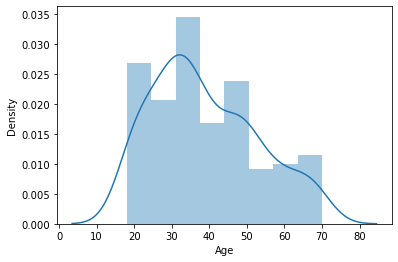

In [94]:
print(sns.distplot(data['Age']))

In [95]:
data.kurt()

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [96]:
data.var()

CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [97]:
data.std()

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

# Find the outliers and replace them outliers

<AxesSubplot:xlabel='Annual Income (k$)'>

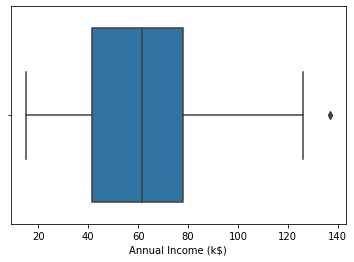

In [98]:
sns.boxplot(data['Annual Income (k$)'])

In [99]:
qnt=data.quantile(q=(0.30,0.45))

qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.30,60.70,30.0,46.00,40.00
0.45,90.55,35.0,58.55,47.55


In [100]:
iqr =qnt.loc[0.45]-qnt.loc[0.30] #iqr calculation
iqr

CustomerID                29.85
Age                        5.00
Annual Income (k$)        12.55
Spending Score (1-100)     7.55
dtype: float64

In [101]:
#lower extreme values
lower=qnt.loc[0.30]-1.5*iqr
lower


CustomerID                15.925
Age                       22.500
Annual Income (k$)        27.175
Spending Score (1-100)    28.675
dtype: float64

In [102]:
#upper extreme values
upper=qnt.loc[0.45]+1.5*iqr
upper

CustomerID                135.325
Age                        42.500
Annual Income (k$)         77.375
Spending Score (1-100)     58.875
dtype: float64

In [103]:
data['CustomerID']=np.where(data['CustomerID']>45,31,data['CustomerID'])

<AxesSubplot:xlabel='Annual Income (k$)'>

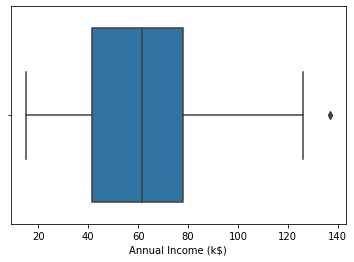

In [104]:
sns.boxplot(data['Annual Income (k$)'])

# Encoding Categorical Values

In [105]:
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [106]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [107]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['Gender'])
data["Gender"] = label

In [109]:
data['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

# Scaling the data

In [110]:
X = data.drop("Age",axis=1)
Y = data['Age']

In [111]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-4.02405716  1.12815215 -1.73899919 -0.43480148]
 [-3.8813601   1.12815215 -1.73899919  1.19570407]
 [-3.73866304 -0.88640526 -1.70082976 -1.71591298]
 [-3.59596597 -0.88640526 -1.70082976  1.04041783]
 [-3.45326891 -0.88640526 -1.66266033 -0.39597992]
 [-3.31057185 -0.88640526 -1.66266033  1.00159627]
 [-3.16787479 -0.88640526 -1.62449091 -1.71591298]
 [-3.02517772 -0.88640526 -1.62449091  1.70038436]
 [-2.88248066  1.12815215 -1.58632148 -1.83237767]
 [-2.7397836  -0.88640526 -1.58632148  0.84631002]
 [-2.59708654  1.12815215 -1.58632148 -1.4053405 ]
 [-2.45438947 -0.88640526 -1.58632148  1.89449216]
 [-2.31169241 -0.88640526 -1.54815205 -1.36651894]
 [-2.16899535 -0.88640526 -1.54815205  1.04041783]
 [-2.02629829  1.12815215 -1.54815205 -1.44416206]
 [-1.88360122  1.12815215 -1.54815205  1.11806095]
 [-1.74090416 -0.88640526 -1.50998262 -0.59008772]
 [-1.5982071   1.12815215 -1.50998262  0.61338066]
 [-1.45551004  1.12815215 -1.43364376 -0.82301709]
 [-1.31281297 -0.88640526 -1.43

# Clustering Algorithm

In [112]:
x = data.iloc[:, [3, 4]].values

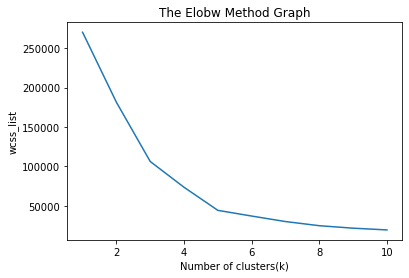

In [113]:
from sklearn.cluster import KMeans  
wcss_list= []   
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [114]:
#training the K-means model on a dataset  

kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

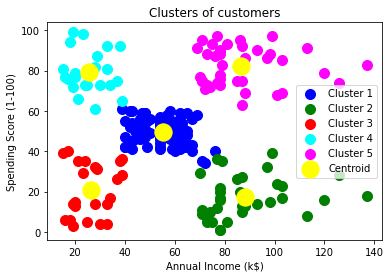

In [115]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

# Split the data into dependent and independent variables.

In [116]:
#target variable

y=data['Age']
y.head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [117]:
#independent

x=data.drop(columns=['Age'],axis=1)

x.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,1,15,39
1,2,1,15,81
2,3,0,16,6
3,4,0,16,77
4,5,0,17,40


In [118]:
data=pd.get_dummies(data,columns=['Age'])

data.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,...,Age_59,Age_60,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70
0,1,1,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
#encoding 
data = pd.get_dummies(data, drop_first=True)
data.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,...,Age_59,Age_60,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70
0,1,1,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the data into training and testing

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [122]:
x_train.shape

(160, 4)

In [123]:
x_test.shape

(40, 4)

In [124]:
y_train.shape

(160,)

In [125]:
y_test.shape

(40,)

# Build, test, train the Model

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
#initializing the DT

model=DecisionTreeClassifier()

In [128]:
#encoding 

data = pd.get_dummies(data, drop_first=True)
data.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,...,Age_59,Age_60,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70
0,1,1,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
X = data.drop('Gender', axis=1)
y = data['Gender']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [130]:
#Base model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_trains, y_train)
pred = lr.predict(X_tests)

from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 0.5963843790693397
The r2-score is: -0.4345531213116187


In [131]:
#selecting best feautre

from sklearn.feature_selection import RFE
lr = LinearRegression()
n = [{'n_features_to_select':list(range(1,10))}]
rfe = RFE(lr)

from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(rfe, param_grid=n, cv=3)
gsearch.fit(X, y)

gsearch.best_params_

{'n_features_to_select': 1}

In [132]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X,y)

pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Gender'])

,Gender
CustomerID,45
Annual Income (k$),46
Spending Score (1-100),47
Age_18,3
Age_19,5
Age_20,33
Age_21,21
Age_22,29
Age_23,9
Age_24,35


# Measure the performance using Evaluation Metrics

In [133]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict

models = [   SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4)]
results = []
names = ['SVM','Random Forest','Gradient Boost','K-Nearest Neighbors']
for model,name in zip(models,names):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    rmse = np.sqrt(mean_squared_error(y, cross_val_predict(model, X , y, cv=3)))
    results.append(rmse)
    names.append(name)
    msg = "%s: %f" % (name, rmse)
    print(msg)

SVM: 0.542347
Random Forest: 0.514208
Gradient Boost: 0.538143
K-Nearest Neighbors: 0.523808
